<a href="https://colab.research.google.com/github/goulartsursula/DisciplinasUERJ/blob/master/Estrutura%20da%20Materia%202/RessonanciaSpinEletron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ressonância de Spin do Elétron

###1. Legenda

Momento dipolar magnético: ($\mu_S$)

Magneton de Bohr: ($\mu_B$)

Campo magnético: ($B$)

Permeabilidade do vácuo: ($\mu_0$)

Número de espiras na bobina: ($N$)

Raio das bobinas: ($R$)

Corrente estabelecida: ($I$)

Campo elétrico ($E$)

Fator de Landé para o elétron ($g_s$)

###2. Dados/ Formulário

$\mu_S = g_s \mu_B \frac{s}{h}$ 

$\mu_B = \frac{eh}{2m_c}$

$\Delta E = g_S \mu_B B$

$\Delta E = hv$

$E = m_S g_S \mu_B B$

$\nu = \frac{g_s\mu_B B}{h}$

$B = \mu_0 (\frac{4}{5})^{\frac{3}{2}}N\frac{1}{R}$

$E = -\mu_S B$

$\mu_0 = 1.256 \times 10^{-6}H/m$

$N = 320$

$g_s$ = 2

$h = 1.054571726 \times 10^{−34}J.s$

$m_S = \pm \frac{1}{2}$

$R = (6.93 \pm 0.02)cm$

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Dados
g = 2
h = 1.054571726e-34
N = 320
u0 = 1.256e-6
m = 9.10938e-31
e = 1.60217662e-19
R = 0.0693
erro_R = 0.0002

In [6]:
data = pd.read_csv('Dados_RessonanciaDoSpin.dat', sep='\s+')
data['I = I0/2'] = data['I0']/2

data.head(10)

,F,I0,I = I0/2
0,30,0.64,0.320
1,33,0.70,0.350
2,36,0.76,0.380
3,39,0.82,0.410
4,42,0.90,0.450
5,45,0.96,0.480
6,48,1.03,0.515
7,51,1.09,0.545
8,54,1.13,0.565
9,57,1.19,0.595


###3. Ajuste Linear

$\nu = aI + b$

y = (96.28871256718683 +- 1.4719585236322859)x +( -0.8684412592780859 +- 0.7159971378104939)


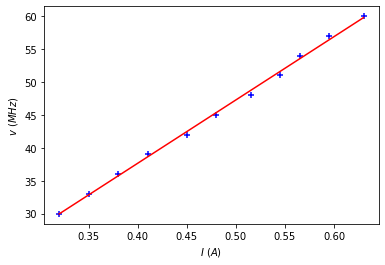

In [7]:
x = data['I = I0/2']
y = data['F']

def lsq_sq(x, y):  
  n = np.size(x)
  mx, my = np.mean(x), np.mean(y)

  cov = np.mean(x * y) - mx * my
  var = np.var(x)

  a = cov/var
  b = my - a *mx

  ey = np.sqrt(np.sum(np.power(y - (a * x + b),2) / (n - 2)))
  
  erro_a = ey / (np.sqrt(var) * np.sqrt(n))
  erro_b = erro_a * np.sqrt(np.mean(np.power(x, 2)))

  print(f'y = ({a} +- {erro_a})x +' + f'( {b} +- {erro_b})')
  return a, erro_a, b, erro_b

parametros = lsq_sq(x, y)

plt.scatter(data['I = I0/2'], (data['F']), marker='+', color='blue')
plt.plot(data['I = I0/2'], parametros[0]*data['I = I0/2']+parametros[2], color='red')

plt.xlabel('$I \ (A)$')
plt.ylabel('$v \ (MHz)$')
plt.show()


###4. Fator de Landé

$\nu = \frac{5^{3/2}}{2}\frac{\pi m_e R}{e \nu_0 N}a$

In [8]:
gexp = (np.power(5, 3/2)*np.pi*m*R*parametros[0])/(2*e*u0*N)
erro_gexp = gexp * (np.sqrt(np.power((parametros[1]/parametros[0]),2)+np.power((erro_R/R),2)))

print(gexp, '+-', erro_gexp)

1.657762493614374e-06 +- 2.578975260784328e-08


###4.1 Discrepância

In [17]:
D = np.abs(g - gexp)

if D < 2*erro_gexp:
  print ('É compatível com o valor de referência: D = ', D)

if 2*erro_gexp < D < 3*erro_gexp:
  print('Inconclusivo: D = ', D)

if D > 3*erro_gexp:
  print('Não é compatível com o valor de referência: D = ', D)

Não é compatível com o valor de referência: D =  1.9999983422375063


###4.2 Erro relativo

In [19]:
E = (erro_gexp/gexp)*100
print(round(E, 2), '%')

1.56 %
